**1. Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**2. Load and Inspect Dataset**

In [3]:
df=pd.read_csv('/content/Housing.csv')

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()
# No missing Values

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [8]:
df.duplicated().sum()
# No duplicte values

np.int64(0)

**3.Outlier treatment**

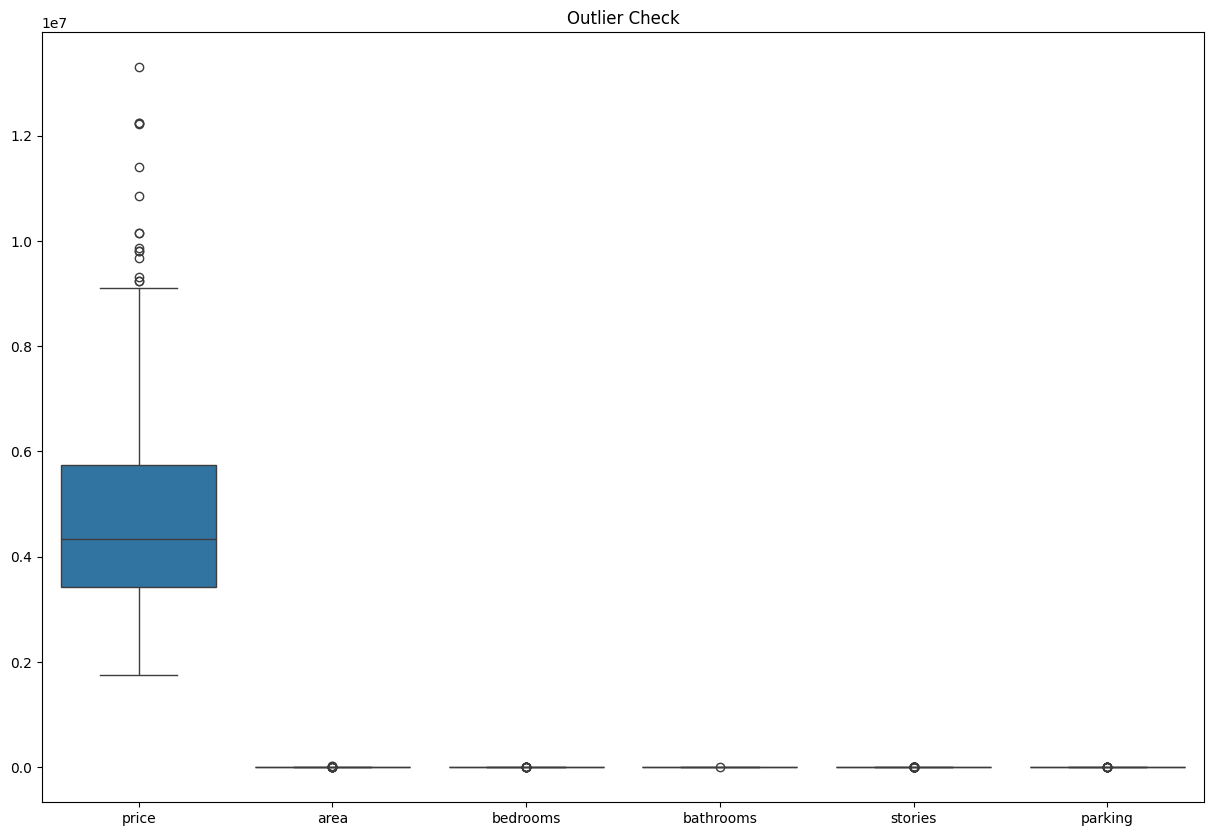

In [9]:
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.title("Outlier Check")
plt.show()

In [10]:
# Calculate the IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper extreme
upper_extreme = Q3 + 1.5 * IQR

# Cap the outliers
df['price'] = np.where(df['price'] > upper_extreme, upper_extreme, df['price'])

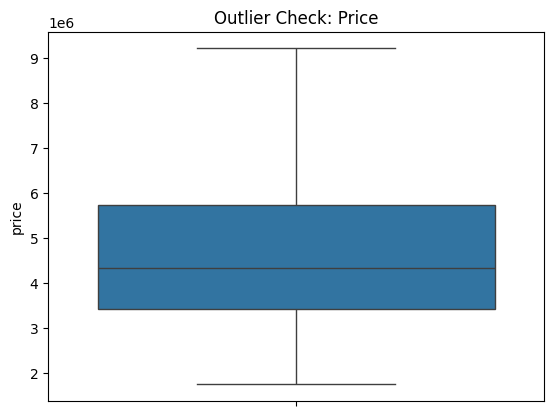

In [11]:
sns.boxplot(df['price'])
plt.title("Outlier Check: Price")
plt.show()

**4. Preprocess the Data**

In [12]:
# Convert categorical columns to numeric (if any)
df_encoded = pd.get_dummies(df, drop_first=True)

# Example output
df_encoded


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9205000.0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,9205000.0,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9205000.0,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,9205000.0,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,9205000.0,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150.0,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000.0,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000.0,2910,3,1,1,0,False,False,False,False,False,False,False,False


**5.Correlation matrix:**

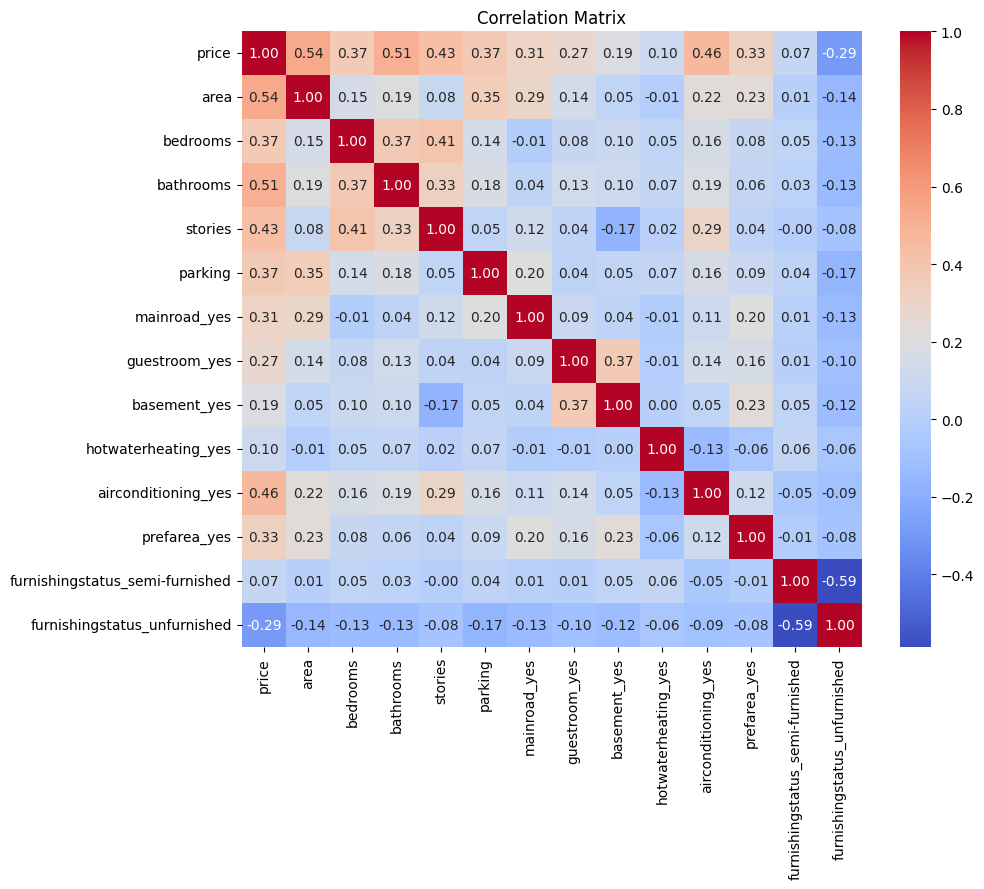

In [13]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**6. Define Target & Features**

In [14]:
# Simple Linear Regression (1 feature)
X_simple = df_encoded[['area']]
y = df_encoded['price']
# Multiple Linear Regression (all numeric features)
X_multi = df_encoded.drop('price', axis=1)


**7. Split Data**

In [15]:
# For simple regression
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# For multiple regression
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)


**8. Train Linear Regression Models**

In [16]:
# Simple
lr_simple = LinearRegression()
lr_simple.fit(X_train_s, y_train_s)

# Multiple
lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)


LinearRegression()

**9. Evaluate Model**

In [17]:
y_pred_s = lr_simple.predict(X_test_s)

print("Simple Linear Regression:")
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))



Simple Linear Regression:
MAE: 1391695.7066908358
MSE: 2904977424824.121
R² Score: 0.2809269373268739


In [18]:
y_pred_m = lr_multi.predict(X_test_m)

print("\nMultiple Linear Regression:")
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))



Multiple Linear Regression:
MAE: 869709.5970885222
MSE: 1275852327984.6704
R² Score: 0.6841865161626447


**10. Visualize Regression Line**

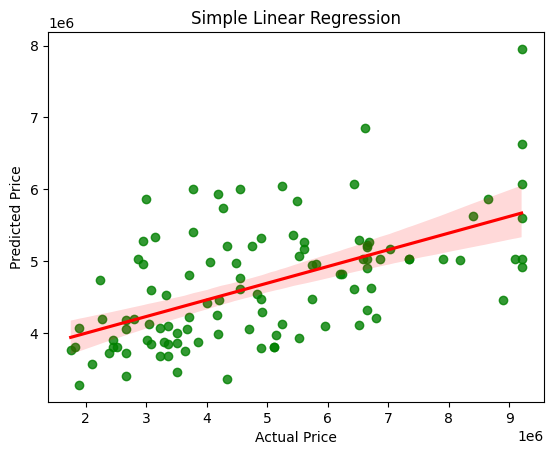

In [26]:
# Actual vs. Predicted Plot
sns.regplot(data=df_encoded,x=y_test_s,y=y_pred_s,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Simple Linear Regression")
plt.show()


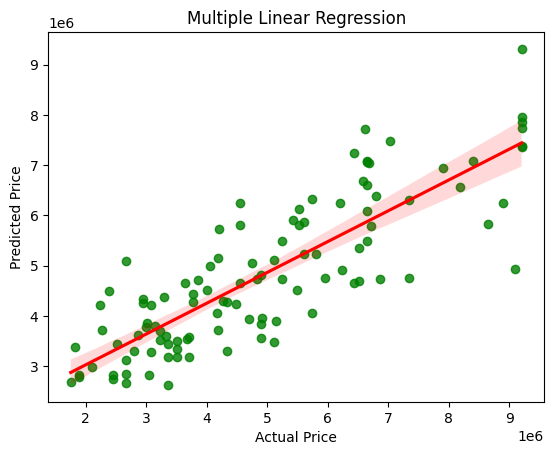

In [27]:
# Actual vs. Predicted Plot
sns.regplot(data=df_encoded,x=y_test_m,y=y_pred_m,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression")
plt.show()

**11. Interpret Coefficients**

In [30]:
print("Intercept (Simple):", lr_simple.intercept_)
print("Coefficient (Simple):", lr_simple.coef_)

print("\nIntercept (Multiple):", lr_multi.intercept_)
print("Coefficients (Multiple):")
for feature, coef in zip(X_multi.columns, lr_multi.coef_):
    print(f"{feature}: {coef}")


Intercept (Simple): 2583185.700012862
Coefficient (Simple): [406.76580964]

Intercept (Multiple): 419867.67567603197
Coefficients (Multiple):
area: 227.97695289832822
bedrooms: 69870.42603518919
bathrooms: 974174.7960272066
stories: 415481.7504735289
parking: 187399.0573504212
mainroad_yes: 387640.1801058048
guestroom_yes: 262150.6893672609
basement_yes: 370923.77342204296
hotwaterheating_yes: 724710.3061021513
airconditioning_yes: 766231.908981316
prefarea_yes: 614958.6961084659
furnishingstatus_semi-furnished: -73747.22809829538
furnishingstatus_unfurnished: -383401.80063538125
